### In this exercise we are going to look into different type of convolutions

In [ ]:
# import all necessary libraries
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from cuda import initialize_cuda
from result import class_level_accuracy, plot_metric, save_and_show_result
from model.train import train
from model.evaluate import val
from model.network import Net
from model.utils import cross_entropy_loss, sgd_optimizer, model_summary
from data.dataset import cifar10_dataset, cifar10_classes
from data.downloader import download_cifar10

### Initialize variables inside a class

In [15]:
class Args:

    # Data Loading
    # ============

    train_batch_size = 64
    val_batch_size = 64
    num_workers = 4

    # Regularization
    # ==============
    dropout = 0.1

    # Training
    # ========
    random_seed = 1
    epochs = 25
    learning_rate = 0.01
    momentum = 0.9

#### Using CIFAR10 dataset

Files already downloaded and verified


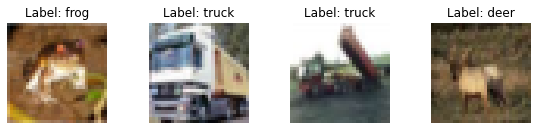

In [16]:
# Download data
cifar_dataset = download_cifar10()
classes = cifar10_classes()
sample_data, sample_targets = cifar_dataset.data, cifar_dataset.targets

# Get image size
image_size = np.transpose(sample_data[0], (2, 0, 1)).shape

# Set number of images to display
num_images = 4

# Display images with labels
fig, axs = plt.subplots(1, 4, figsize=(8, 8))
fig.tight_layout()

for i in range(num_images):
    axs[i].axis('off')
    axs[i].set_title(f'Label: {classes[sample_targets[i]]}')
    axs[i].imshow(sample_data[i])

### Initialize GPU

In [17]:
# Initialize CUDA and set random seed
cuda, device = initialize_cuda(Args.random_seed)

GPU Available? True


### Creating train and test data loaders

In [18]:
# Create train data loader
train_loader = cifar10_dataset(
    Args.train_batch_size, cuda, Args.num_workers, train=True
)

# Create val data loader
val_loader = cifar10_dataset(
    Args.val_batch_size, cuda, Args.num_workers, train=False
)

Files already downloaded and verified
Files already downloaded and verified


### Creating model from the Net class

In [19]:
model = Net(Args.dropout).to(device)  # Create model
model_summary(model, image_size)  # Display model summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           2,080
           Conv2d-11           [-1, 32, 16, 16]           9,248
             ReLU-12           [-1, 32, 16, 16]               0
      BatchNorm2d-13           [-1, 32, 16, 16]              64
          Dropout-14           [-1, 32,

### Training the model for 25 epochs

In [20]:
losses = []
accuracies = []
incorrect_samples = []

criterion = cross_entropy_loss()  # Create loss function
optimizer = sgd_optimizer(model, Args.learning_rate, Args.momentum)  # Create optimizer

for epoch in range(1, Args.epochs + 1):
    print(f'Epoch {epoch}:')
    train(model, train_loader, device, optimizer, criterion)
    val(model, val_loader, device, criterion, losses, accuracies, incorrect_samples)

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 1:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0181, Accuracy: 5880/10000 (58.80%)

Epoch 2:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0142, Accuracy: 6787/10000 (67.87%)

Epoch 3:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0123, Accuracy: 7242/10000 (72.42%)

Epoch 4:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0108, Accuracy: 7616/10000 (76.16%)

Epoch 5:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0104, Accuracy: 7724/10000 (77.24%)

Epoch 6:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0100, Accuracy: 7827/10000 (78.27%)

Epoch 7:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0103, Accuracy: 7717/10000 (77.17%)

Epoch 8:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0095, Accuracy: 7935/10000 (79.35%)

Epoch 9:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0091, Accuracy: 8034/10000 (80.34%)

Epoch 10:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0085, Accuracy: 8154/10000 (81.54%)

Epoch 11:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0086, Accuracy: 8130/10000 (81.30%)

Epoch 12:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0086, Accuracy: 8148/10000 (81.48%)

Epoch 13:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0088, Accuracy: 8108/10000 (81.08%)

Epoch 14:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0089, Accuracy: 8092/10000 (80.92%)

Epoch 15:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0086, Accuracy: 8187/10000 (81.87%)

Epoch 16:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0082, Accuracy: 8226/10000 (82.26%)

Epoch 17:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0082, Accuracy: 8242/10000 (82.42%)

Epoch 18:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0083, Accuracy: 8185/10000 (81.85%)

Epoch 19:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0083, Accuracy: 8250/10000 (82.50%)

Epoch 20:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0081, Accuracy: 8271/10000 (82.71%)

Epoch 21:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 8299/10000 (82.99%)

Epoch 22:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0082, Accuracy: 8270/10000 (82.70%)

Epoch 23:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0079, Accuracy: 8350/10000 (83.50%)

Epoch 24:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0081, Accuracy: 8301/10000 (83.01%)

Epoch 25:


Loss=0.40 Batch_ID=781 Accuracy=87.00: 100%|██████████| 782/782 [00:06<00:00, 116.80it/s]



Validation set: Average loss: 0.0084, Accuracy: 8238/10000 (82.38%)



### Plot the validation loss

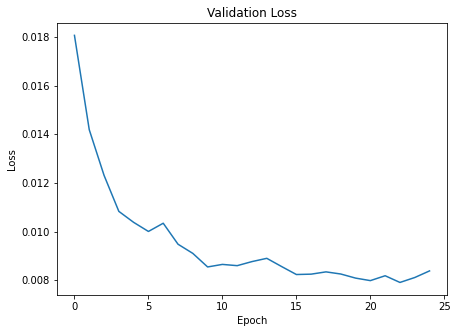

In [21]:
plot_metric(losses, 'Loss')

### Plot the validation accuracy

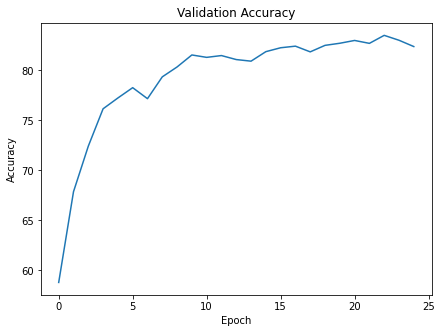

In [22]:
plot_metric(accuracies, 'Accuracy')

### Display 25 missclassified images by the model

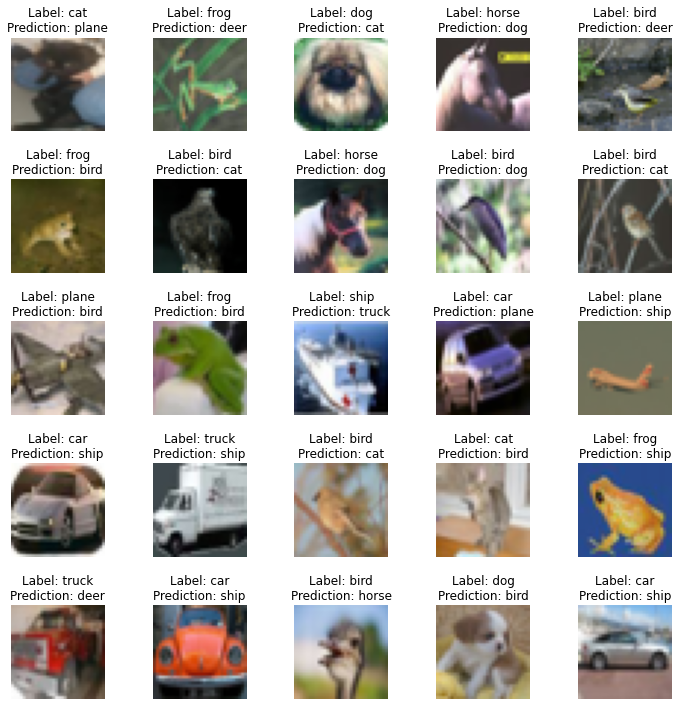

In [23]:
save_and_show_result(incorrect_samples, classes)

### Accuracy of individual classes

In [24]:
class_level_accuracy(model, val_loader, device, classes)

Accuracy of plane : 90 %
Accuracy of   car : 88 %
Accuracy of  bird : 61 %
Accuracy of   cat : 69 %
Accuracy of  deer : 82 %
Accuracy of   dog : 68 %
Accuracy of  frog : 93 %
Accuracy of horse : 84 %
Accuracy of  ship : 93 %
Accuracy of truck : 90 %
